In [1]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.2 MB/s 
     |████████████████████████████████| 133 kB 66.9 MB/s 


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

In [16]:
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [80]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [81]:
imageData = [] # Stores images as numpy arrays
paths = [] # stores path of all the images
encodedResult = [] # stores encoded format of target class (0 or 1) for all the images

for r, _, f in os.walk(r'/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[0]]).toarray())

In [82]:
paths = []
for r, _, f in os.walk(r"/content/drive/My Drive/Colab Notebooks/BTD/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        imageData.append(np.array(img))
        encodedResult.append(encoder.transform([[1]]).toarray())

In [83]:
np_list = imageData

In [84]:
imageData = np.array(imageData)
imageData.shape

(139, 128, 128, 3)

In [85]:
imageData = imageData/255
imageData

array([[[[0.01176471, 0.01176471, 0.01176471],
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02745098, 0.02745098, 0.02745098],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01568627, 0.01568627, 0.01568627],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.02352941, 0.02352941, 0.02352941]

In [86]:
encodedResult[:5]

[array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]])]

In [87]:
encodedResult = np.array(encodedResult)
encodedResult = encodedResult.reshape(139,2)
encodedResult[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [88]:
new_encodedResult = []
for val in encodedResult:
  new_encodedResult.append(val[1])
new_encodedResult

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [89]:
new_encodedResult = np.array(new_encodedResult)
new_encodedResult

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [90]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = train_test_split(imageData, encodedResult, test_size=0.3, shuffle=True, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(imageData, new_encodedResult, test_size=0.3, shuffle=True, random_state=0)
print(x_train.shape)  # (60000, 28, 28)
#print(y_train.shape)  # (60000,)
#print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(97, 128, 128, 3)


In [91]:
y_train[:5]

array([1., 1., 1., 0., 0.])

In [92]:
y_train.reshape(1,-1)
y_train[:5]

array([1., 1., 1., 0., 0.])

In [93]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
history = clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 01m 11s]
val_loss: 0.028622636571526527

Best val_loss So Far: 0.028622636571526527
Total elapsed time: 00h 01m 11s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 2.6190 - accuracy: 0.5052
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 1.4383 - accuracy: 0.5670
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.5671 - accuracy: 0.6907
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 0.3499 - accuracy: 0.8969
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.3120 - accuracy: 0.8454
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.2223 - accuracy: 0.9278
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1593 - accuracy: 0.9485
Epoch 8/10
4/4 [==============================] - 6s 1s/step - loss: 0.1000 - accuracy: 0.9794
Epoch 9/10
4/4 [==============================] - 6s 1s/step - l

In [94]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 128, 128, 3)      0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 128, 128, 3)      7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0     

In [95]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

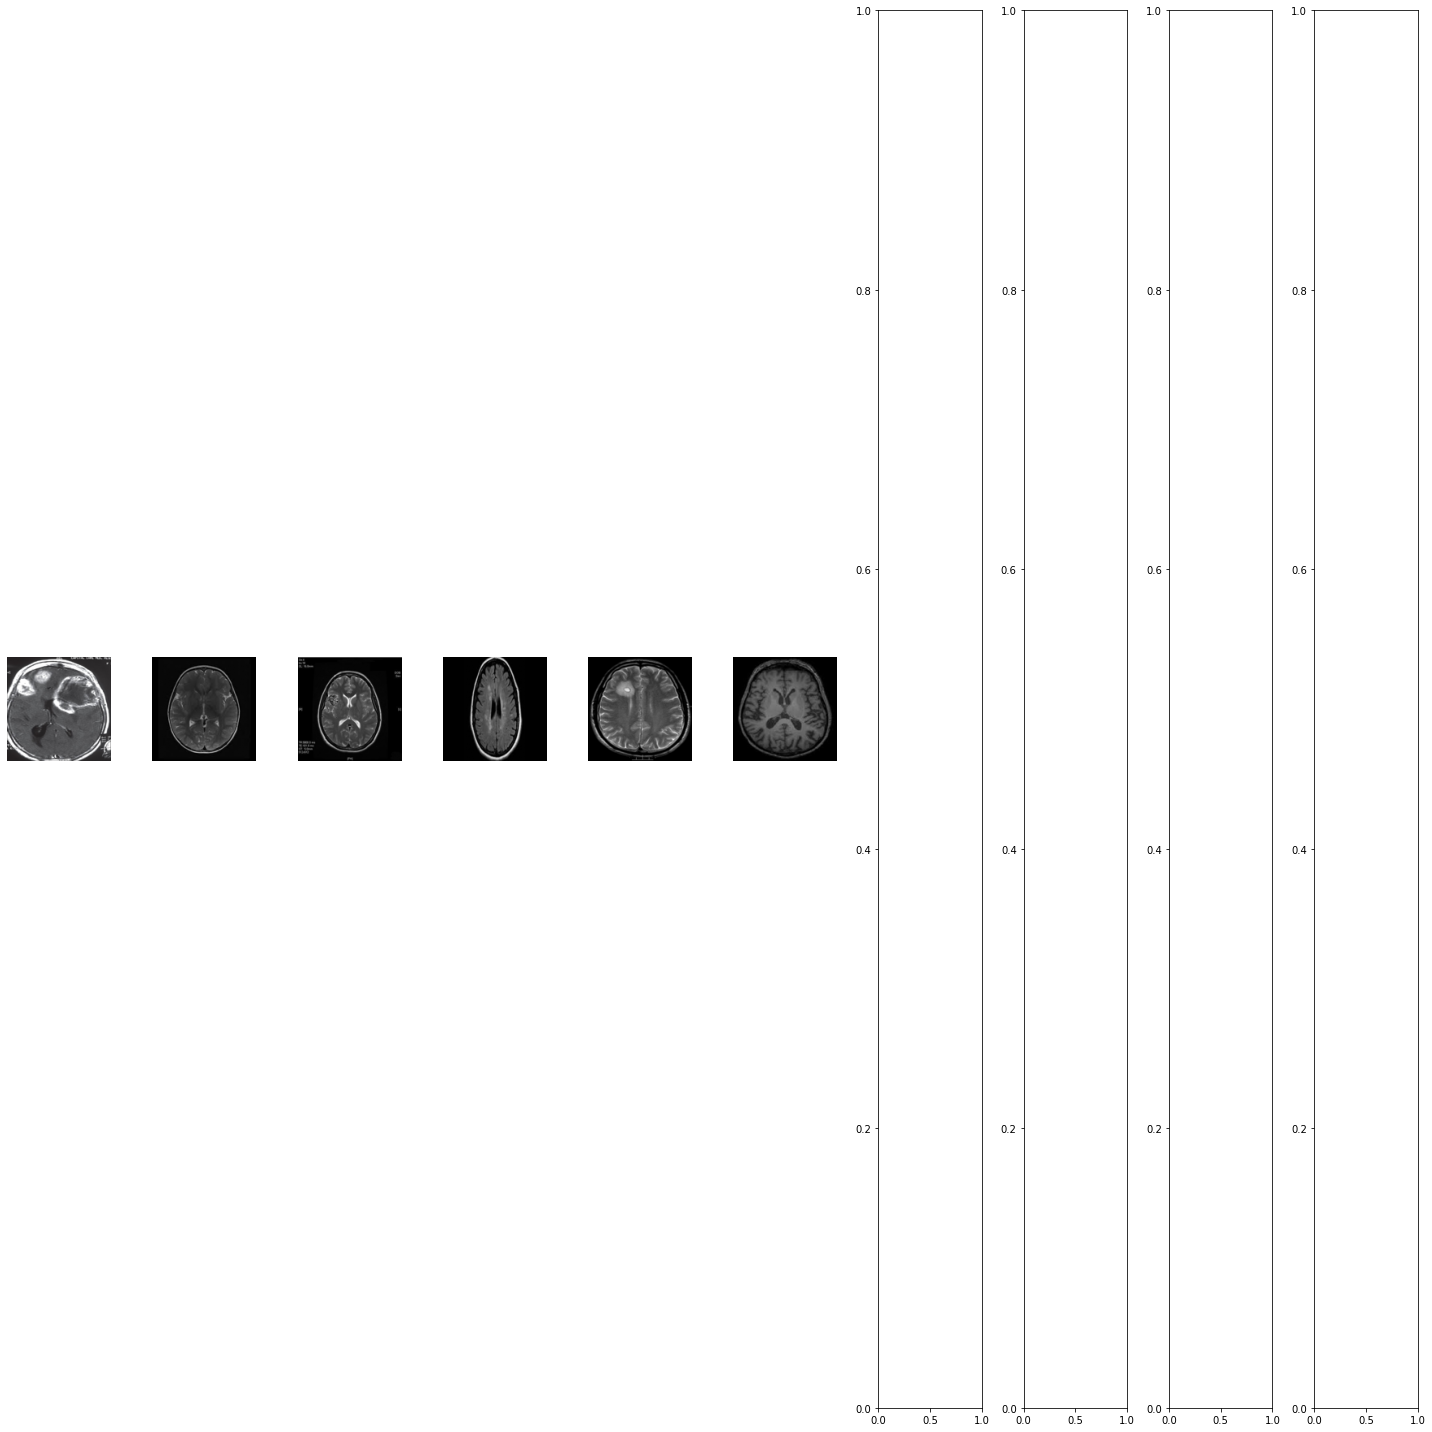

In [96]:
plotImages(x_test[:6])

In [97]:
# Predict with the best model.
predicted_y = clf.predict(x_test[:6])
print(predicted_y)

1/1 [==============================] - 0s 99ms/step
[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [98]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

2/2 [==============================] - 1s 151ms/step - loss: 0.5529 - accuracy: 0.7381
[0.5528926849365234, 0.738095223903656]
